In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Acunmedya/11.hafta/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


No missing values

# 📊**Column Descriptions**

**Serial No.:**	 An ID number used only for ordering in the dataset.

**GRE Score:** Graduate Record Examination score (ranges from 260 to 340; higher is better).

**TOEFL Score:**	English proficiency test score (ranges from 0 to 120; higher is better).

**University Rating:**	Prestige rating of the university (ranges from 1 to 5; subjective but influential).

**SOP:**	Statement of Purpose quality – rated from 1 to 5.

**LOR:**	Strength of the Letter of Recommendation – rated from 1 to 5.

**CGPA:**	Undergraduate GPA on a 10-point scale. Higher scores increase the chance of admission.

**Research:**	Indicates whether the student has research experience (1 = Yes, 0 = No).

**Chance of Admit:**	Probability of the student being admitted (ranges from 0.00 to 1.00). This is the target variable.

---

In [6]:
# Since, there is no label such as accepted/rejected. Labeling is required.
df["Chance of Admit Binary"] = (df["Chance of Admit "] >= 0.75).astype(int)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit Binary
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [15]:
print(df.columns.tolist())

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'Chance of Admit Binary']


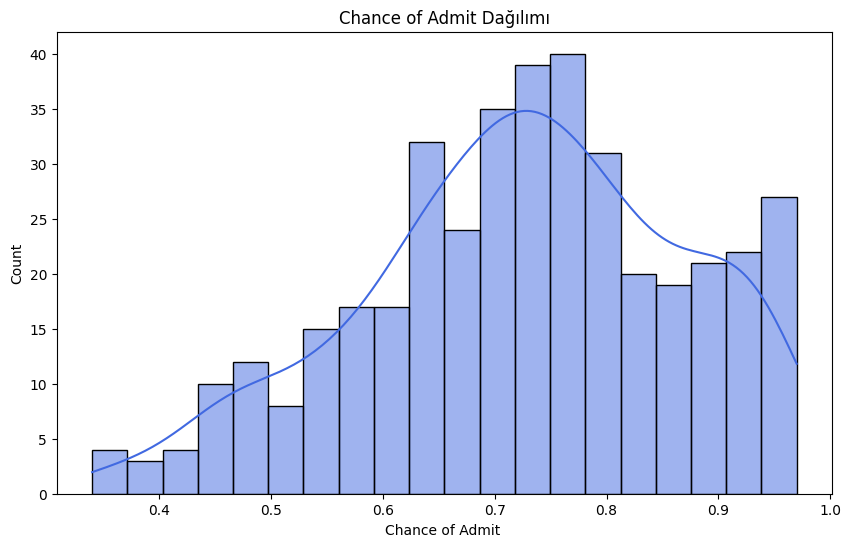

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,
             x='Chance of Admit ',
             kde=True,
             bins=20,
             color='royalblue')
plt.title('Chance of Admit Dağılımı')
plt.show()

The skewness is not observed on Chance of Admit

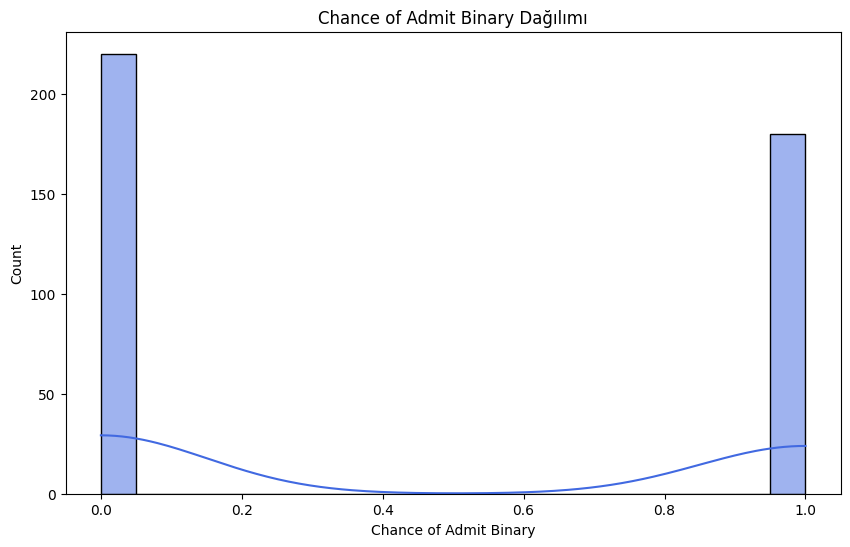

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,
             x='Chance of Admit Binary',
             kde=True,
             bins=20,
             color='royalblue')
plt.title('Chance of Admit Binary Dağılımı')
plt.show()

Also, It is like not imbalanced

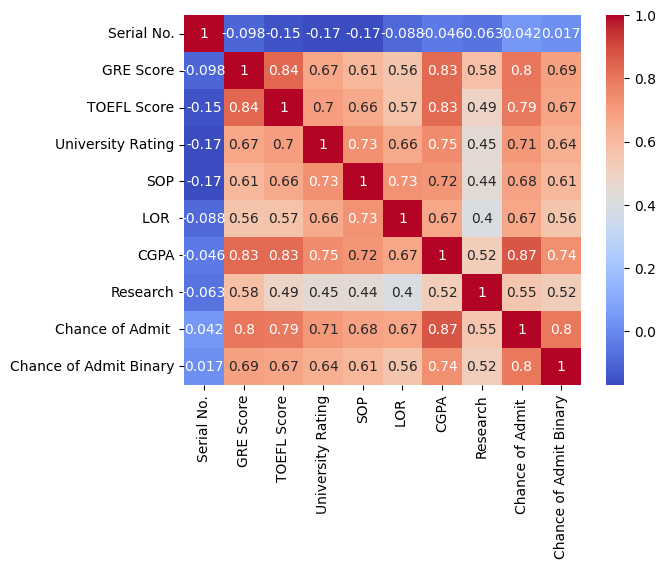

In [9]:
# To determine the importance of features on the target variable, the correlation analysis is observed.
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [10]:
# Low correlation is observed in Serial No. and Research. But Research will not be dropped for now.
df.drop('Serial No.', axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit Binary
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


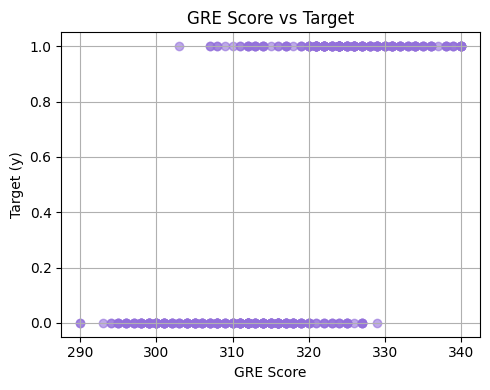

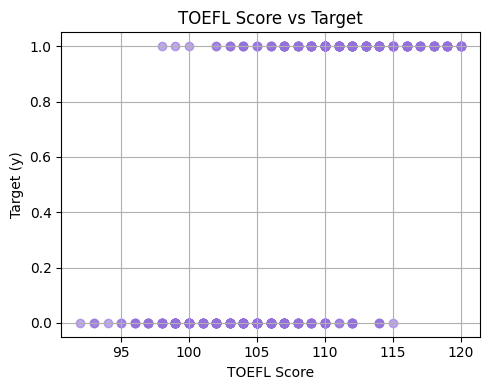

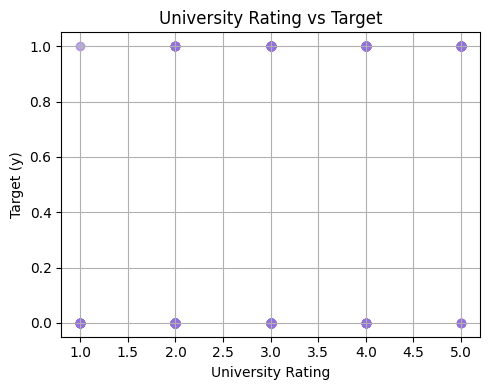

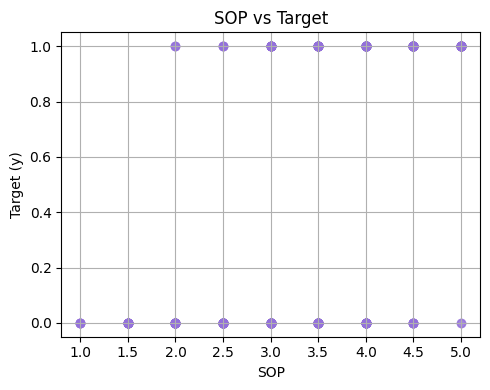

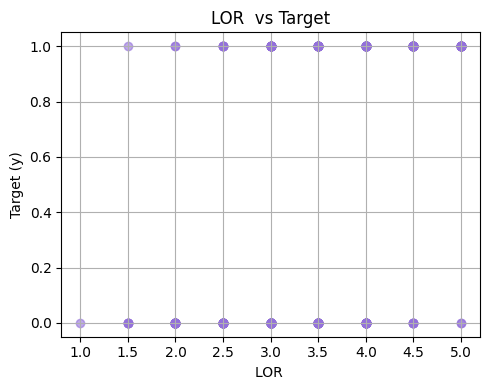

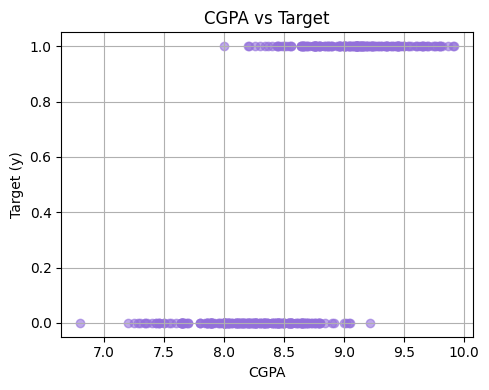

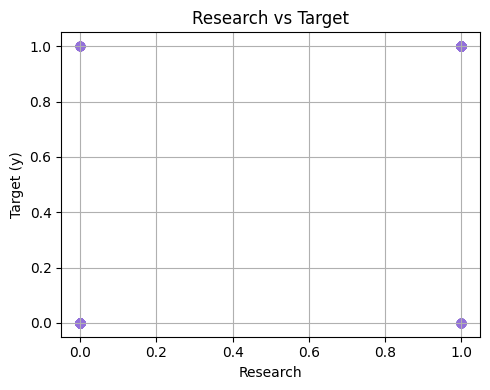

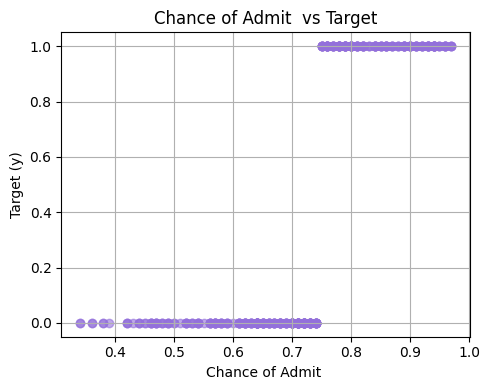

In [11]:
# Data split is required as target variable and features.
x = df.drop('Chance of Admit Binary', axis=1)
y = df['Chance of Admit Binary']


# This function will be recalled through this notebook to observe the relationships between features and target variable.
import matplotlib.pyplot as plt

def scatter_features_vs_target(x, y):
    for feature in x.columns:
        plt.figure(figsize=(5, 4))
        # alpha stands for the color transparency
        plt.scatter(x[feature], y, alpha=0.6, color='mediumpurple')
        plt.title(f'{feature} vs Target', fontsize=12)
        plt.xlabel(feature)
        plt.ylabel('Target (y)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
scatter_features_vs_target(x,y)

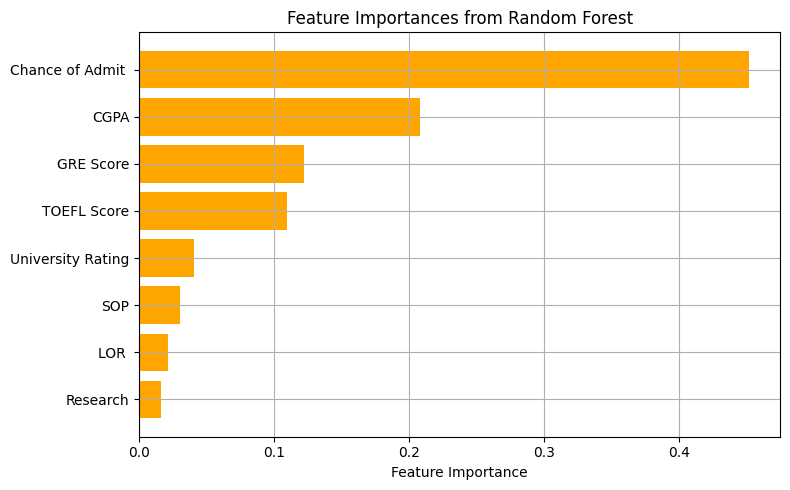

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x, y)
importances = model.feature_importances_
feature_names = x.columns
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.gca().invert_yaxis()  # En önemli en üstte görünsün
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.grid(True)
plt.tight_layout()
plt.show()

It is obviously seen that the most important feature is CGPA in this dataset.

In [19]:
#  Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



#  Split the data into training and testing sets
#  Use 80% of the data for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

#  Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

#  Train a Logistic Regression model
#  Initialize the Logistic Regression model
model = LogisticRegression()

#  Train the model on the training data
model.fit(X_train_scaled, y_train)

#  Make predictions on the test data
y_pred = model.predict(X_test_scaled)

#  Evaluate and analyze the model
#  Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#  Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

#  Display precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#  Compare predicted probabilities with actual values
y_prob = model.predict_proba(X_test_scaled)[:, 1]
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted_Probability': y_prob})
print("\nPredicted probabilities vs Actual values (first 10 rows):")
print(comparison_df.head(10))


Accuracy: 0.96

Confusion Matrix:
[[42  2]
 [ 1 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.95      0.97      0.96        36

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80


Predicted probabilities vs Actual values (first 10 rows):
   Actual  Predicted_Probability
0       0               0.013840
1       1               0.813786
2       1               0.676615
3       0               0.001684
4       0               0.016513
5       0               0.001350
6       0               0.109536
7       0               0.000030
8       0               0.000006
9       1               0.760130


# Model Evaluation

With 0.96 accuracy, model performs well on learning. On the other hand, compared with recall, precision is lower. It seems that model can catch some negatives as positives.

In [20]:
#  Track the model’s learning process

from sklearn.linear_model import SGDClassifier

#  Initialize a logistic regression model with SGD (Stochastic Gradient Descent)
#  Using SGDClassifier to access weights and biases per iteration


""" Hyperparameters:
    1. loss='log_loss'
    Meaning: The correct loss function for logistic regression.
    log_loss computes class probabilities (between 0 and 1).

    2. max_iter=1000
    Meaning: Maximum number of training iterations (epochs).
    Effect:
    Too low → model may not learn enough (underfitting).
    Too high → longer training (but early stopping is controlled by tol).

    3. tol=1e-3 (Tolerance = 0.001)
    Meaning: Determines when to stop training.
    How It Works:
    Stops if the loss improvement between iterations falls below tol.
    Example: If the loss difference < 0.001, training stops.

    4. learning_rate='optimal'
    Meaning: Automatically adjusts the learning rate.
    Alternatives:
    'constant': Fixed learning rate (set via eta0).
    'invscaling': Gradually decreasing learning rate.
    Advantage:
    'optimal' starts with larger steps and reduces them over time for faster and stable convergence.

    5. random_state=42
    Meaning: Ensures reproducible results for random operations.

    6. verbose=1
    Meaning: Prints training progress logs.
    Levels:
    0: Silent (no output).
    1: Progress bar and epoch info.
    >1: Detailed logs. """

sgd_model = SGDClassifier(
    loss='log_loss',     # correct loss function for logistic regression
    max_iter=1000,
    tol=1e-3,
    learning_rate='optimal',
    random_state=42,
    verbose=1
)


#  Fit the model and track weights and bias updates
# (Note: verbose=1 prints convergence messages showing how tol is reached)
sgd_model.fit(X_train_scaled, y_train)

# Print final weights (coefficients) and bias (intercept)
print("\nFinal Weights (W):")
print(sgd_model.coef_)

print("\nFinal Bias (b):")
print(sgd_model.intercept_)


-- Epoch 1
Norm: 55.84, NNZs: 8, Bias: -4.878030, T: 320, Avg. loss: 1.359056
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 58.34, NNZs: 8, Bias: -13.435219, T: 640, Avg. loss: 0.497327
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 59.68, NNZs: 8, Bias: -9.563464, T: 960, Avg. loss: 0.226617
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 53.17, NNZs: 8, Bias: -8.818146, T: 1280, Avg. loss: 0.076321
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 52.04, NNZs: 8, Bias: -5.713574, T: 1600, Avg. loss: 0.126825
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 48.58, NNZs: 8, Bias: -7.144552, T: 1920, Avg. loss: 0.105730
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 45.01, NNZs: 8, Bias: -7.346277, T: 2240, Avg. loss: 0.028830
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 43.90, NNZs: 8, Bias: -5.622897, T: 2560, Avg. loss: 0.076262
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 41.51, NNZs: 8, Bias: -5.202463, T: 2880, Avg. loss: 0.043886
Total train

The results are optimum weights and bias.

# **How to develop the model?**

1.   *Threshold Tuning*

        Adjusting the classification threshold can significantly impact model performance. Instead of the default 0.5, try thresholds like 0.4, 0.6, or even optimize it using precision-recall or ROC curves to better balance false positives and false negatives.


2.   *Try with other model alternatives*

        Different algorithms may yield better results depending on the data. Consider experimenting with:

            Random Forest
            
3.   *Feature Engineering*

🔍 Feature Importances:
             Feature  Importance
7   Chance of Admit     4.985006
5               CGPA    0.836902
3                SOP    0.397313
2  University Rating    0.345236
1        TOEFL Score    0.261312
4               LOR     0.205921
0          GRE Score    0.115196
6           Research    0.044616


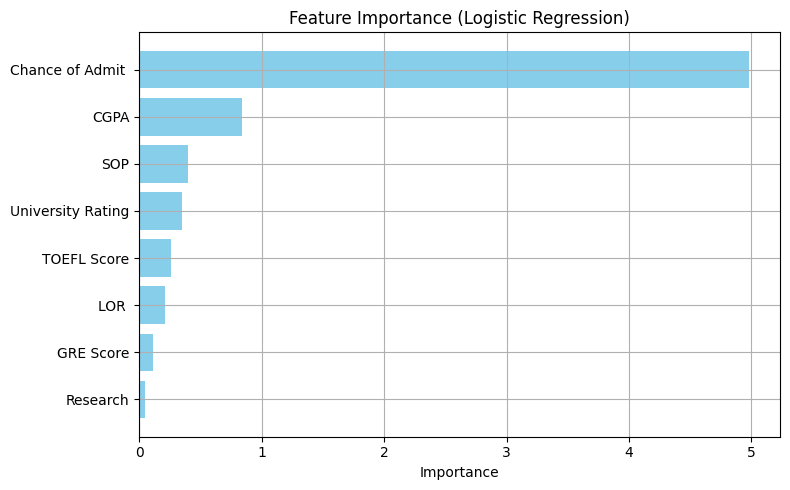


🔁 Threshold = 0.7
Confusion Matrix:
[[44  0]
 [ 5 31]]

Classification Report:
              precision    recall  f1-score   support

           0      0.898     1.000     0.946        44
           1      1.000     0.861     0.925        36

    accuracy                          0.938        80
   macro avg      0.949     0.931     0.936        80
weighted avg      0.944     0.938     0.937        80


🔁 Threshold = 0.8
Confusion Matrix:
[[44  0]
 [ 7 29]]

Classification Report:
              precision    recall  f1-score   support

           0      0.863     1.000     0.926        44
           1      1.000     0.806     0.892        36

    accuracy                          0.912        80
   macro avg      0.931     0.903     0.909        80
weighted avg      0.925     0.912     0.911        80



In [21]:
#  Interpreting Results and Improving the MODEL

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Examine the most important features based on logistic regression coefficients
# Assuming you have a trained logistic regression model (e.g., 'model') and feature names (X_train.columns)
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': np.abs(model.coef_[0])  # Take absolute value for magnitude comparison
}).sort_values(by='Importance', ascending=False)

print("🔍 Feature Importances:")
print(importance_df)

# Optional: Visualize feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance (Logistic Regression)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


#  Analyze the effect of changing classification thresholds (e.g., 0.7, 0.8)
# First, get predicted probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Try different thresholds
for threshold in [0.7, 0.8]:
    print(f"\n🔁 Threshold = {threshold}")
    y_pred_threshold = (y_probs >= threshold).astype(int)

    # Evaluate performance
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_threshold))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_threshold, digits=3))


🔹 Adım 18: Modelin geliştirilmesi için öneriler yazın (örneğin, daha fazla özellik ekleme, farklı algoritmalar deneme vb.).


In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Pozitif sınıf olasılıkları
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Youden J Index: TPR - FPR'i maksimize eden threshold
j_scores = tpr - fpr
optimal_idx = j_scores.argmax()
optimal_threshold_roc = thresholds[optimal_idx]

print(f"ROC tabanlı optimal threshold: {optimal_threshold_roc:.4f}")

ROC tabanlı optimal threshold: 0.4063


This value increased the accuracy

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

def train_and_evaluate(x, y, threshold=0.5):  # default 0.5
    """
    Trains a logistic regression model on the given features and labels.
    Applies feature scaling and evaluates performance using a custom threshold.

    Parameters:
    - x: Features (numpy array or pandas DataFrame)
    - y: Labels (numpy array or pandas Series)
    - threshold: Classification threshold for positive class (default=0.5)

    Returns:
    - model: Trained LogisticRegression model
    """
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Standardize the feature data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Initialize and train the logistic regression model
    model = LogisticRegression()
    model.fit(x_train, y_train)

    # Predict probabilities for the positive class
    y_proba = model.predict_proba(x_test)[:, 1]

    # Apply custom threshold to convert probabilities to binary predictions
    y_pred = (y_proba >= threshold).astype(int)

    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"AUC Score: {roc_auc_score(y_test, y_proba):.5f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")

    return model

# Example usage
model = train_and_evaluate(x, y, threshold=0.6)


Confusion Matrix:
[[46  1]
 [ 1 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.97      0.97      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

AUC Score: 0.99936
Accuracy: 0.97500


In [39]:
model = train_and_evaluate(x, y, threshold=0.4063)
model = train_and_evaluate(x, y, threshold=0.5)
model = train_and_evaluate(x, y, threshold=0.7)

Confusion Matrix:
[[43  4]
 [ 0 33]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.89      1.00      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80

AUC Score: 0.99936
Accuracy: 0.95000
Confusion Matrix:
[[45  2]
 [ 0 33]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.94      1.00      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

AUC Score: 0.99936
Accuracy: 0.97500
Confusion Matrix:
[[46  1]
 [ 1 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98 

When threshold get smaller precision becomes smaller. It means model catch some negatives as positive. It means that threshold value 0.4063 is low. It should be increased. Also accuracy is lower

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

def train_and_evaluate_rf(x, y, threshold=0.5):
    """
    Trains a Random Forest classifier on the given features and labels.
    Applies feature scaling and evaluates performance using a custom threshold.

    Parameters:
    - x: Features (numpy array or pandas DataFrame)
    - y: Labels (numpy array or pandas Series)
    - threshold: Classification threshold for positive class (default=0.5)

    Returns:
    - model: Trained RandomForestClassifier model
    """
    # Split the dataset
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Train Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)

    # Predict probabilities for the positive class
    y_proba = model.predict_proba(x_test)[:, 1]

    # Apply custom threshold
    y_pred = (y_proba >= threshold).astype(int)

    # Evaluation
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

    return model


model = train_and_evaluate_rf(x, y, threshold=0.6)

Confusion Matrix:
[[47  0]
 [ 0 33]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        33

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy: 1.0000
AUC Score: 1.0000


Random forest gives the max accuracy. Because the dataset is small

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

def evaluate_model_with_cross_val(x, y, model, cv=5):
    """
    Evaluates the model performance using cross-validation and prints the results.
    It helps to check if the model is overfitting by comparing training and validation scores.

    Parameters:
    - x: Features (numpy array or pandas DataFrame)
    - y: Labels (numpy array or pandas Series)
    - model: The model to be evaluated (e.g., RandomForestClassifier, LogisticRegression, etc.)
    - cv: Number of cross-validation splits (default=5)

    Returns:
    - None
    """
    # Standardize the feature data
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    # Perform cross-validation
    scores = cross_val_score(model, x_scaled, y, cv=cv, scoring='accuracy')

    # Print cross-validation scores and average score
    print(f"Cross-validation scores: {scores}")
    print(f"Average CV Accuracy: {scores.mean():.4f}")
    print(f"Standard Deviation of CV Accuracy: {scores.std():.4f}")

    # Check for overfitting by comparing training and validation scores
    if scores.std() > 0.1:  # You can adjust the threshold based on your data
        print("Warning: High variance in cross-validation scores, potential overfitting.")
    else:
        print("Model performance is stable across folds.")

# Example usage
model = LogisticRegression( random_state=42)
evaluate_model_with_cross_val(x, y, model)


Cross-validation scores: [0.975  0.925  1.     0.9875 0.95  ]
Average CV Accuracy: 0.9675
Standard Deviation of CV Accuracy: 0.0269
Model performance is stable across folds.


# CONSEQUENTLY

---

*   Lower threshold is not useful for this model. 0.6 or 0.7 can be choosen for threshold value since they have higher accuracies.
*   Preferring the logistic regression model is sufficient.





